# 0. 사용할 패키지 불러오기

In [4]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.python.keras.models import load_model
from keras.models import model_from_json
import time

# 1. 데이터 불러오기

In [5]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4622981600106460800
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12161013025861999808
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 12648448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8254765847696499629
physical_device_desc: "device: 0, name: GeForce RTX 2080, pci bus id: 0000:17:00.0, compute capability: 7.5"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 6716833792
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2427167009528639935
physical_device_desc: "device: 1, name: GeForce RTX 2080, pci bus id: 0000:b3:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 18335749225274995433
physical_device_desc: "device: XLA_GPU device"
]


In [7]:
import numpy as np
import glob
import sys
from sklearn.model_selection import train_test_split

x_train = np.empty((0, 320, 320, 3))
y_train = np.empty((0, 3))
print(y_train.shape)
t= time.time()
training_data = glob.glob('/home/pirl/Documents/selected_motion_data10000/*.npz')
#print(training_data)
idx=1
for single_npz in training_data:
    with np.load(single_npz) as data:
        #print(data.files)
        x = data['train']
        y = data['training_labels']
        #print(x.shape)
    x = np.reshape(x, (-1, 320, 320,3))
    
    x_train = np.vstack((x_train, x))
    y_train = np.vstack((y_train, y))
    if idx % 100 ==0:
        print(str((time.time()-t)//60)+" min",idx)
    idx+=1
print(x_train.shape)
# train test split, 7:3
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state = 42)

y_train = y_train[:,:]
y_test = y_test[:,:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(0, 3)
0.0 min 100
0.0 min 200
1.0 min 300
2.0 min 400
3.0 min 500
5.0 min 600
8.0 min 700
10.0 min 800
12.0 min 900
15.0 min 1000
18.0 min 1100
22.0 min 1200
25.0 min 1300
29.0 min 1400
33.0 min 1500
39.0 min 1600
43.0 min 1700
48.0 min 1800
54.0 min 1900
60.0 min 2000
66.0 min 2100
72.0 min 2200
78.0 min 2300
85.0 min 2400
92.0 min 2500
100.0 min 2600
107.0 min 2700
115.0 min 2800
123.0 min 2900
132.0 min 3000
140.0 min 3100
149.0 min 3200
159.0 min 3300
168.0 min 3400
178.0 min 3500
188.0 min 3600
198.0 min 3700
209.0 min 3800
220.0 min 3900
231.0 min 4000
243.0 min 4100
254.0 min 4200
266.0 min 4300
279.0 min 4400
292.0 min 4500
304.0 min 4600
318.0 min 4700
331.0 min 4800
345.0 min 4900
359.0 min 5000
373.0 min 5100
388.0 min 5200
403.0 min 5300
418.0 min 5400
433.0 min 5500
449.0 min 5600
465.0 min 5700
481.0 min 5800
498.0 min 5900
514.0 min 6000
531.0 min 6100
549.0 min 6200
567.0 min 6300
585.0 min 6400
603.0 min 6500
621.0 min 6600
640.0 min 6700
659.0 min 6800
679.0 min 6900

# 데이터 확인

In [3]:
#import pandas as pd

#y_data = pd.DataFrame(y_total[:, :])

In [4]:
#y_data.count()

In [5]:
#left = y_data.loc[y_data[:][0] == 1]

In [6]:
#left.count()

In [7]:
#right = y_data.loc[y_data[:][1] == 1]

In [8]:
#right.count()

In [9]:
#forward = y_data.loc[y_data[:][2] == 1]

In [10]:
#forward.count()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

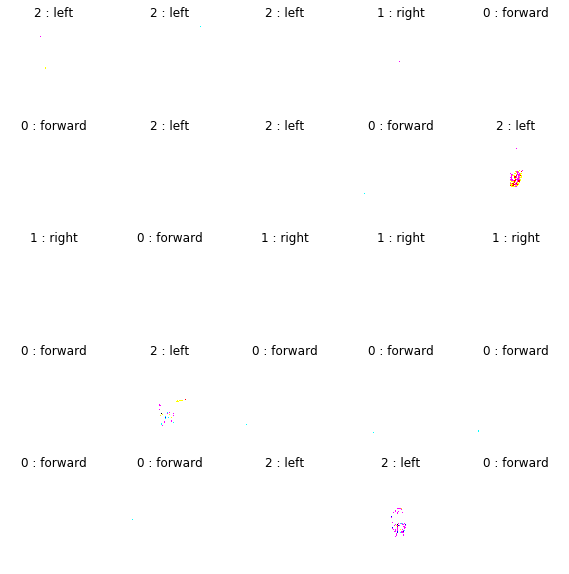

In [9]:
# 데이터 확인

from matplotlib import pyplot as plt
%matplotlib inline

plt_row = 5
plt_col = 5
plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):

    sub_plt = axarr[int(i/plt_row), int(i%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(320, 320,3))
    
    label = np.argmax(y_train[i])
                      
    if label == 2 :
        direction = 'left'
    elif label == 1:
        direction = 'right'
    elif label == 0:
        direction = 'forward'
#     elif label == 3:
#         direction = 'backward'
                      
    sub_plt_title = str(label) + " : " + direction
    sub_plt.set_title(sub_plt_title)

plt.show()

# 3. 모델 생성

In [10]:
# image size = 160 x 320
def posla_net():
    
    # model setting
    H = 320
    W = 320
    CH = 3

    inputShape = (H, W, CH)

    activation = 'relu'
    keep_prob_conv = 0.25
    keep_prob_dense = 0.5

    #init = 'glorot_normal'
    #init = 'he_normal'
    init = 'he_uniform'
    chanDim = -1
    classes = 3
    
    model = Sequential()
    
    # CONV => RELU => POOL
    model.add(Conv2D(3, (3, 3), padding="valid", input_shape=inputShape, kernel_initializer=init, activation=activation))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(9, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(18, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(80, kernel_initializer=init, activation=activation))
    model.add(Dropout(keep_prob_dense))
    
    model.add(Dense(15, kernel_initializer=init, activation=activation))
    model.add(Dropout(keep_prob_dense))
    
    # softmax classifier
    model.add(Dense(classes , activation = 'softmax'))
    
    return model


In [11]:
model = posla_net()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 318, 3)       84        
_________________________________________________________________
batch_normalization (BatchNo (None, 318, 318, 3)       12        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 159, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 157, 9)       252       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 78, 9)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 76, 18)        1476      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 18)        0         
__________

In [26]:
from tensorflow.python.keras.utils import plot_model
plot_model(model, to_file= 'video_net_plot.png', show_shapes = True, show_layer_names = True)

# 4. 모델 파라미터 셋팅

적은 수의 이미지 데이터가 존재할 경우 데이터를 늘리는 용도로 사용

In [12]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [14]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [15]:
# initialize the model
# EPOCHS = 50
# INIT_LR = 1e-3
# BS = 32
# split_ratio = 0.2

In [16]:
EPOCHS = 50
INIT_LR = 1e-4
BS = 256
split_ratio = 0.2

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])
 

[INFO] compiling model...


# 5. 모델 훈련

In [32]:
from tensorflow.keras.utils import to_categorical


In [33]:
y_binary = to_categorical(y_train)

In [17]:

hist = model.fit(x_train, y_train, 
                 epochs=EPOCHS, batch_size=BS, 
                 validation_split=split_ratio, 
                 verbose = 1
                 ,callbacks=[reduce_lr]
                )

Train on 5600 samples, validate on 1400 samples
Epoch 1/50


ResourceExhaustedError: OOM when allocating tensor with shape[80,15] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node dense_1/kernel/Initializer/random_uniform/RandomUniform (defined at <ipython-input-10-ae2ab2e4d0aa>:42)  = RandomUniform[T=DT_INT32, _class=["loc:@dense_1/kernel/Assign"], dtype=DT_FLOAT, seed=0, seed2=0, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1/kernel/Initializer/random_uniform/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'dense_1/kernel/Initializer/random_uniform/RandomUniform', defined at:
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-f51137829256>", line 1, in <module>
    model = posla_net()
  File "<ipython-input-10-ae2ab2e4d0aa>", line 42, in posla_net
    model.add(Dense(15, kernel_initializer=init, activation=activation))
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/training/checkpointable/base.py", line 474, in _method_wrapper
    method(self, *args, **kwargs)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py", line 175, in add
    output_tensor = layer(self.outputs[0])
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 746, in __call__
    self.build(input_shapes)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py", line 944, in build
    trainable=True)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 609, in add_weight
    aggregation=aggregation)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/training/checkpointable/base.py", line 639, in _add_variable_with_custom_getter
    **kwargs_for_getter)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 1977, in make_variable
    aggregation=aggregation)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 183, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 146, in _variable_v1_call
    aggregation=aggregation)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 125, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2437, in default_variable_creator
    import_scope=import_scope)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 187, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 297, in __init__
    constraint=constraint)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 409, in _init_from_args
    initial_value() if init_from_fn else initial_value,
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 1959, in <lambda>
    shape, dtype=dtype, partition_info=partition_info)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py", line 486, in __call__
    shape, -limit, limit, dtype, seed=self.seed)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/ops/random_ops.py", line 243, in random_uniform
    rnd = gen_random_ops.random_uniform(shape, dtype, seed=seed1, seed2=seed2)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/ops/gen_random_ops.py", line 733, in random_uniform
    name=name)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/pirl/anaconda3/envs/frcnn1/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[80,15] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node dense_1/kernel/Initializer/random_uniform/RandomUniform (defined at <ipython-input-10-ae2ab2e4d0aa>:42)  = RandomUniform[T=DT_INT32, _class=["loc:@dense_1/kernel/Assign"], dtype=DT_FLOAT, seed=0, seed2=0, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense_1/kernel/Initializer/random_uniform/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [ ]:
plt.subplot(1, 2, 1)
plt.title('model loss')
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.ylim((0,2))

plt.subplot(1, 2, 2)
plt.title('model accuracy')
plt.plot(hist.history['acc'], label="acc")
plt.plot(hist.history['val_acc'], label="val_acc")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.ylim((0.4, 1))


plt.show();

# 6. 모델 결과 확인

In [ ]:
#l_model = load_model('./model_data/VGG_model.h5')

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=BS)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

In [ ]:
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]

yhat_classes = model.predict_classes(xhat)

for i in range(10):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

# 7. 최종 모델 훈련

In [ ]:
x_total = np.vstack((x_train, x_test))
y_total = np.vstack((y_train, y_test))

print(x_total.shape)
print(y_total.shape)

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=10)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [ ]:
EPOCHS = 50
INIT_LR = 1e-4
BS = 256
split_ratio = 0.2

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

In [ ]:
hist = model.fit(x_total, y_total, 
                 epochs=EPOCHS, batch_size=BS, 
                 #validation_split=split_ratio, 
                 verbose = 1
                 ,callbacks=[reduce_lr]
                )

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=BS)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

In [ ]:
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]

yhat_classes = model.predict_classes(xhat)

for i in range(10):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

# 8. 모델 저장

In [ ]:
model.summary()

In [ ]:
from tensorflow.python.keras.models import model_from_yaml

model_yaml = model.to_yaml()
with open("motion_model_demo.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("motion_model_demo.h5")
print("Saved model to disk")

In [117]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 62, 62, 3)         84        
_________________________________________________________________
batch_normalization_7 (Batch (None, 62, 62, 3)         12        
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 31, 31, 3)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 29, 29, 9)         252       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 9)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 12, 12, 18)        1476      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 18)         